## AccelerateAI - Data Science Global Bootcamp
#### Python Data Analysis: Assignment 01
***

## Wifi Data Analysis
Q2: The demand and usage of the internet is growing across the globe and public wifi is becoming a new normal as we move forward. Wifi providers want to optimize the cost while providing the free and paid wifi. <br>
The use case here refers to public WiFi hotspots in New York City. Please refer to the dataset – Wifi Data.xlsx 
<br>The information comprises of records for every public WiFi hotspot (ones provided by or in partnership with the city) in New York City.<br>
Using Python’s Pandas and Seaborn library to answer following business questions:<br>
 1. [Get the data provided, check frequency distribution of the features, drop irrelevant and redundant features if any and state your inferences?](#first-bullet)
 2. Using appropriate data visualization answer the following:
  - a. [Plot the providers vs number of all wi-fi hotspots they have in operation? Who has the highest installations?](#second-bullet)
  - b. [Plot providers vs number of free wifi hotspots.](#third-bullet)
  - c. [Are there any provider(s) who do not provide free wifi?](#fourth-bullet)
  - d. [Which Location type (Location_T) are most common and least common?](#fifth-bullet)
  - e. [How many free “indoor” and “outdoor” hotspots are there? Which companies have the highest number of Outdoor Free installations.](#sixth-bullet)

<a class="anchor" id="first-bullet"></a>

### 1. Get the data provided, check frequency distribution of the features, drop irrelevant and redundant features if any and state your inferences?

In [76]:
# Data analysis
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

In [77]:
df = pd.read_excel("Wifi Data.xlsx")
df.sample(5)

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
2320,2321,BK,Free,Transit Wireless,40.650782,-73.975776,Subway Station,Brooklyn,3,BK40
1196,1197,BK,Limited Free,SPECTRUM,40.639292,-74.031896,Outdoor,Brooklyn,3,BK31
251,252,BK,Free,BPL,40.675255,-74.010351,Library,Brooklyn,3,BK33
1870,1871,QU,Free,LinkNYC - Citybridge,40.747451,-73.884987,Outdoor Kiosk,Queens,4,QN29
552,553,BK,Limited Free,SPECTRUM,40.673349,-74.008235,Outdoor TWC Aerial,Brooklyn,3,BK33


In [78]:
df.shape

(2566, 10)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    2566 non-null   int64  
 1   Borough     2566 non-null   object 
 2   Type        2566 non-null   object 
 3   Provider    2566 non-null   object 
 4   Latitude    2566 non-null   float64
 5   Longitude   2566 non-null   float64
 6   Location_T  2566 non-null   object 
 7   City        2566 non-null   object 
 8   BoroCode    2566 non-null   int64  
 9   NTACode     2566 non-null   object 
 10  Type_free   2566 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 210.6+ KB


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,2566.0,1283.500000,740.884719,1.000000,642.250000,1283.500000,1924.750000,2566.000000
Latitude,2566.0,40.738396,0.070845,40.509531,40.693069,40.743196,40.796066,40.903723
Longitude,2566.0,-73.947564,0.067150,-74.244107,-73.985954,-73.958354,-73.922968,-73.714838
BoroCode,2566.0,2.196804,1.282300,1.000000,1.000000,2.000000,3.000000,5.000000


In [80]:
# Categorical Variables - Let's do a frequency count.

cat_var = ['Borough','BoroCode', 'Type', 'Provider','Location_T', 'City','NTACode']

for var in cat_var:
    print(var, ":------------")
    print(df[var].value_counts())

Borough :------------
MN    1204
BK     595
QU     415
BX     257
SI      95
Name: Borough, dtype: int64
BoroCode :------------
1    1205
3     593
4     416
2     257
5      95
Name: BoroCode, dtype: int64
Type :------------
Free            1983
Limited Free     581
Partner Site       2
Name: Type, dtype: int64
Provider :------------
LinkNYC - Citybridge       1134
SPECTRUM                    343
Transit Wireless            276
ALTICEUSA                   237
Harlem                      128
Downtown Brooklyn           100
NYPL                         90
QPL                          65
BPL                          59
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         27
City Tech                    11
Partner                       2
Name: Provider, dtype: int64
Location_T :------------
Outdoor Kiosk         1134
Outdoor                696
Subway Station         276
Library                214
Indoor               

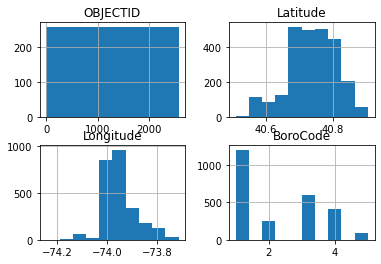

In [81]:
df.hist()
plt.show() 

Inferences:
- Borough and BoroCode are redundant. One of them can be dropped.
- OBJECTID is an ID column and can be dropped as well.

### 2. Using appropriate data visualization answer the following:

- Plot the providers vs number of all wi-fi hotspots they have in operation? Who has the highest installations?
- Plot providers vs number of free wifi hotspots.
- Are there any provider(s) who do not provide free wifi?
- Which Location type (Location_T) are most common and least common?
- How many free “indoor” and “outdoor” hotspots are there? Which companies have the highest number of Outdoor Free installations.

<a class="anchor" id="second-bullet"></a>


#### 2a) Plot the providers vs number of all wi-fi hotspots they have in operation? Who has the highest installations?

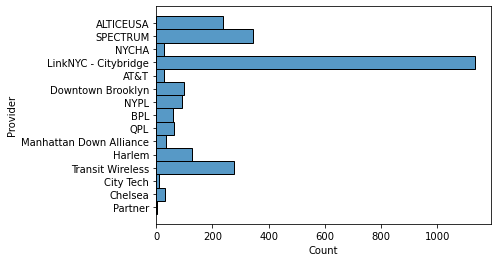

In [82]:
sns.histplot(data=df, y="Provider")

plt.show()

```LinkNYC - Citybridge``` has highest installations.

<a class="anchor" id="third-bullet"></a>

#### 2b) Plot providers vs number of free wifi hotspots.

In [83]:
df['Type'].value_counts()

Free            1983
Limited Free     581
Partner Site       2
Name: Type, dtype: int64

In [84]:
# Add indicator/flag indicating Provider Type = "Free"
import numpy as np
df['Type_free'] = np.where(df['Type'] == 'Free', 1 , 0)

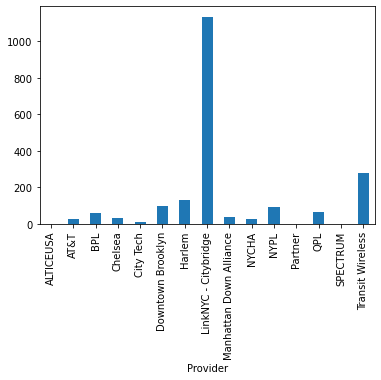

In [85]:
df.groupby('Provider')['Type_free'].sum().plot(kind = 'bar')
plt.show()

<a class="anchor" id="fourth-bullet"></a>


#### 2c) Are there any provider(s) who do not provide free wifi?

In [86]:
df_NonFree_Wifi = df[(df.Type != "Free")]

In [87]:
df_NonFree_Wifi.groupby("Provider").nunique()

,OBJECTID,Borough,Type,Latitude,Longitude,Location_T,City,BoroCode,NTACode,Type_free
Provider,,,,,,,,,,
ALTICEUSA,237,2,1,210,210,2,2,2,32,1
AT&T,1,1,1,1,1,1,1,1,1,1
Partner,2,1,1,2,2,1,1,1,2,1
SPECTRUM,343,4,1,265,263,3,4,4,51,1


Providers are ```ALTICEUSA, AT&T, Partner, SPECTRUM``` (with no "Free" wifi)

<a class="anchor" id="fifth-bullet"></a>


#### 2d) Which Location type (Location_T) are most common and least common?

In [88]:
df['Location_T'].value_counts()

Outdoor Kiosk         1134
Outdoor                696
Subway Station         276
Library                214
Indoor                 125
Outdoor TWC Aerial     121
Name: Location_T, dtype: int64

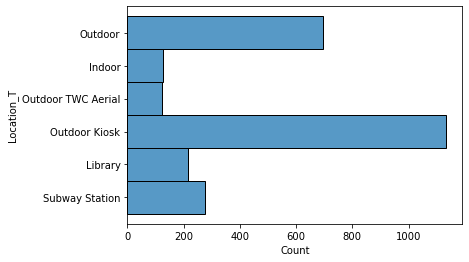

In [89]:
sns.histplot(data=df, y="Location_T")

plt.show()

```Outdoor Kiosk``` is most common and ```Outdoor TWC Aerial``` is least common.

<a class="anchor" id="sixth-bullet"></a>


#### 2e) How many free “indoor” and “outdoor” hotspots are there? Which companies have the highest number of Outdoor Free installations.

In [90]:
df_Indoor = df[(df.Location_T == "Indoor")]

df_Indoor.shape

(125, 11)

There are ```125 Indoor``` hotspots.

In [91]:
df_Outdoor = df[(df.Location_T == "Outdoor")]

df_Outdoor.shape

(696, 11)

There are ```696 Outdoor``` hotspots.

In [92]:
# Outdoor and Free installations
df_Outdoor_Free = df_Outdoor[(df_Outdoor.Type == "Free")]
df_Outdoor_Free

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode,Type_free
65,66,BK,Free,NYCHA,40.695009,-73.979547,Outdoor,Brooklyn,3,BK68,1
66,67,BK,Free,NYCHA,40.694623,-73.979909,Outdoor,Brooklyn,3,BK68,1
67,68,BK,Free,NYCHA,40.694137,-73.979813,Outdoor,Brooklyn,3,BK68,1
68,69,BK,Free,NYCHA,40.694540,-73.979416,Outdoor,Brooklyn,3,BK68,1
69,70,BK,Free,NYCHA,40.694626,-73.975180,Outdoor,Brooklyn,3,BK68,1
...,...,...,...,...,...,...,...,...,...,...,...
2116,2117,BK,Free,City Tech,40.695038,-73.987331,Outdoor,Brooklyn,3,BK38,1
2120,2121,BK,Free,Downtown Brooklyn,40.691224,-73.986620,Outdoor,Brooklyn,3,BK38,1
2518,2519,MN,Free,Chelsea,40.743120,-74.008305,Outdoor,New York,1,MN13,1
2521,2522,BK,Free,Downtown Brooklyn,40.692723,-73.983025,Outdoor,Brooklyn,3,BK38,1


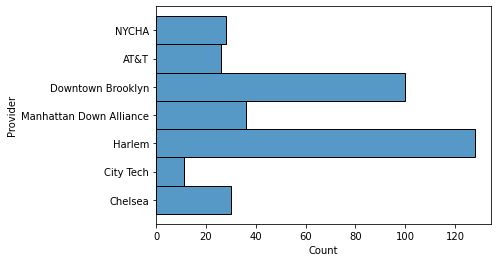

In [93]:
sns.histplot(data=df_Outdoor_Free, y="Provider")

plt.show()

```Harlem``` and ```Downtown Brooklyn``` have highest no. of Outdoor Free installations.

That's all. End of the solution file.